## **1. Loading necessary python libraries**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="dark")
import warnings
warnings.filterwarnings("ignore")

## **2. Data overview view and Wrangling process**

In [7]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [8]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Column names:", df.columns.tolist())

Number of rows: 114000
Number of columns: 21
Column names: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [9]:
df = df.drop(columns=[col for col in df.columns if "unnamed" in col.lower()])
audio_features = [
    "danceability","energy","loudness","speechiness",
    "acousticness","instrumentalness","liveness",
    "valence","tempo"
]

eda_cols = audio_features + ["popularity", "track_genre", "explicit","duration_ms"]
df = df[eda_cols]
df[audio_features + ["popularity"]] = df[audio_features + ["popularity"]].apply(pd.to_numeric, errors='coerce')
df["explicit"] = df["explicit"].astype(bool)
df["track_genre"] = df["track_genre"].astype('category')
df.isnull().sum().sort_values(ascending=False)
df = df.dropna(subset=audio_features + ["popularity"])

bounded_01 = [
    "danceability","energy","speechiness",
    "acousticness","instrumentalness","liveness","valence"
]

for col in bounded_01:
    df = df[df[col].between(0, 1)]

df=df[df["tempo"] > 0]
df=df[df["loudness"] < 0]
df=df[df["popularity"].between(0, 100)]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,113753.0,0.567612,0.172348,0.05130,0.4560,0.580000,0.6950,0.985
energy,113753.0,0.641857,0.250737,0.00002,0.4730,0.685000,0.8540,1.000
loudness,113753.0,-8.246944,4.989263,-46.59100,-10.0040,-7.001000,-5.0050,-0.001
speechiness,113753.0,0.084685,0.105687,0.02210,0.0359,0.048900,0.0845,0.965
acousticness,113753.0,0.314833,0.332390,0.00000,0.0169,0.169000,0.5970,0.996
instrumentalness,113753.0,0.155341,0.308883,0.00000,0.0000,0.000041,0.0476,1.000
liveness,113753.0,0.213155,0.189910,0.00925,0.0979,0.132000,0.2730,1.000
valence,113753.0,0.474797,0.258835,0.00000,0.2610,0.464000,0.6830,0.995
tempo,113753.0,122.300339,29.645595,30.20000,99.4060,122.022000,140.0720,243.372
popularity,113753.0,33.232196,22.318398,0.00000,17.0000,34.000000,50.0000,100.000


The dataset was cleaned for exploratory analysis by removing index artifacts, enforcing correct data types, handling missing values conservatively, and validating feature ranges based on Spotify’s audio feature definitions.

## **3. Popularity vs Audio Characteristics**


To understand whether individual audio features explain song popularity, a correlation analysis was performed.

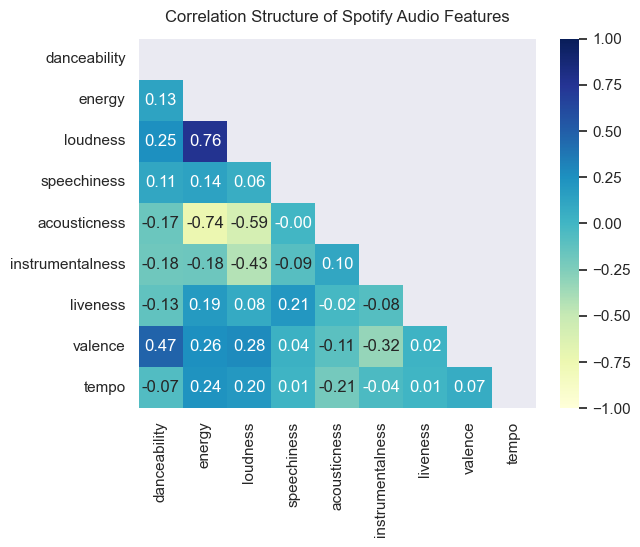

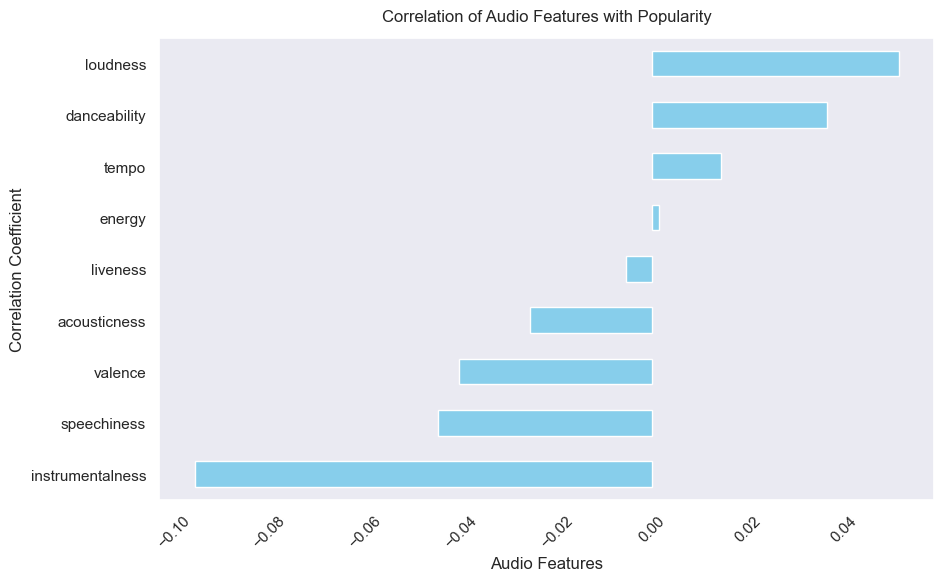

In [10]:
corr_df = df[audio_features].corr()
mask=np.triu(np.ones_like(corr_df, dtype=bool))
sns.heatmap(corr_df, annot=True, cmap='YlGnBu',mask=mask,center=0,fmt='.2f',vmin=-1,vmax=1)
plt.title("Correlation Structure of Spotify Audio Features", pad=12)
plt.show()
pop_corr =df[audio_features].corrwith(df['popularity']).sort_values()
pop_corr.plot(kind='barh',color='skyblue', figsize=(10,6))
plt.title("Correlation of Audio Features with Popularity", pad=12)
plt.ylabel("Correlation Coefficient")
plt.xlabel("Audio Features")
plt.xticks(rotation=45)
plt.show()

This correlation heatmap highlights the underlying structure among Spotify audio features, indicating that several variables capture overlapping aspects of musical characteristics. In particular, energy and loudness show a strong positive correlation, suggesting that they measure similar dimensions of perceived intensity. Conversely, acousticness exhibits strong negative correlations with both energy and loudness, differentiating acoustic tracks from highly produced and energetic ones.

A moderate positive relationship is observed between danceability and valence, indicating that more rhythmically engaging songs also tend to convey a more positive emotional tone. Features such as liveness and speechiness show weak correlations with most other attributes, implying that they capture relatively independent characteristics of a track.

From the popularity correlation plot, it is evident that all relationships between individual audio features and popularity are relatively weak. This suggests that no single audio attribute is sufficient to determine a track’s popularity. Instead, popularity appears to be influenced by a combination of factors such as genre, artist recognition, marketing, and listener preferences, rather than acoustic features alone.




## **4. Genre-Level Popularity Patterns**


To examine whether popularity distributions differ across genres, the analysis focuses on the top 10 most frequent genres.

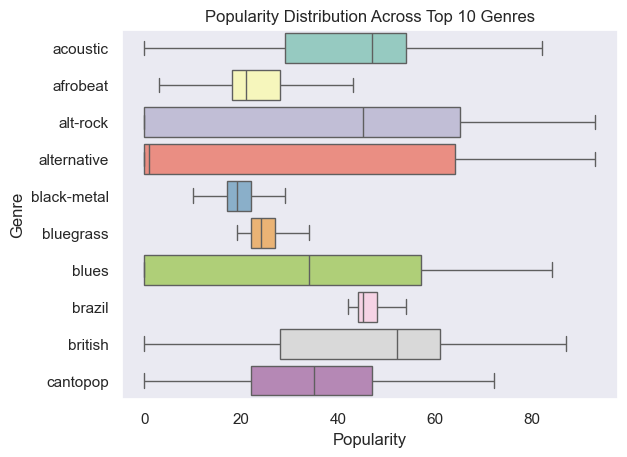

In [11]:
top_genres = df["track_genre"].value_counts().nlargest(10).index
df_top = df[df["track_genre"].isin(top_genres)].copy()
# After filtering categorical data, remove unused categories
# to avoid plotting non-existent label
df_top["track_genre"] = (
    df_top["track_genre"].astype("category").cat.remove_unused_categories()
)
sns.boxplot(data=df_top, y='track_genre', x='popularity',showfliers=False,palette='Set3',hue='track_genre')
plt.title("Popularity Distribution Across Top 10 Genres")
plt.xlabel("Popularity")
plt.ylabel("Genre")
plt.show()

The boxplot reveals substantial overlap in popularity distributions across the top 10 genres. While some genres exhibit higher median popularity and greater variability, the differences are not pronounced enough to suggest that genre alone strongly determines track success. Instead, popularity appears to be influenced by factors beyond genre classification, consistent with earlier findings from feature correlation analysis.

## **5. Structural Factors: Explicit Content and Duration**


To examine whether structural factors such as explicit content or song duration affect popularity.

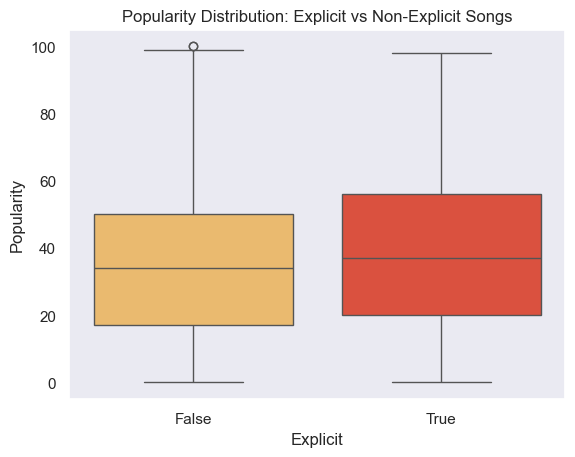

In [12]:
sns.boxplot(data=df, x='explicit', y='popularity',palette='YlOrRd')
plt.title("Popularity Distribution: Explicit vs Non-Explicit Songs")
plt.xlabel("Explicit")
plt.ylabel("Popularity")
plt.show()

Comparing explicit and non-explicit tracks reveals only a modest difference in popularity distributions. While explicit songs may exhibit a slightly higher median popularity, the substantial overlap between the two groups indicates that explicit content alone does not strongly influence a track’s popularity. This suggests that explicitness is likely correlated with other factors such as genre, artist identity, or audience demographics rather than being a direct driver of popularity.

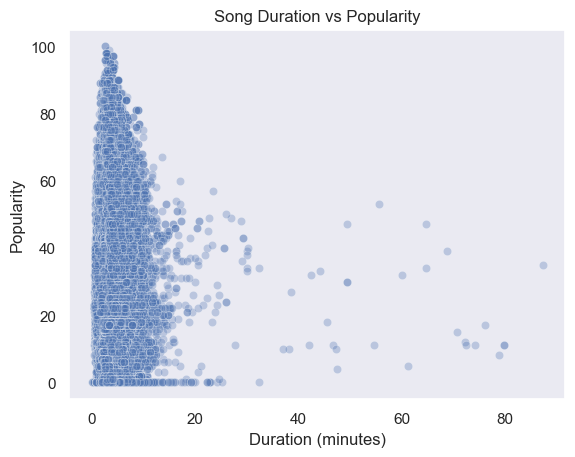

In [13]:
raw = pd.read_csv("dataset.csv")
df["duration_ms"] = raw["duration_ms"]
df["duration_mins"] = df["duration_ms"] / 60000
sns.scatterplot(
    data=df,
    x="duration_mins",
    y="popularity",
    alpha=0.3
)

plt.title("Song Duration vs Popularity")
plt.xlabel("Duration (minutes)")
plt.ylabel("Popularity")
plt.show()



The scatterplot of song duration versus popularity reveals no strong linear relationship. While highly popular tracks tend to cluster around moderate durations (approximately 2–4 minutes), substantial variability exists across all song lengths. This suggests that duration may impose practical constraints on popularity but is not a primary determinant of a track’s success.

## **Conclusion**

This exploratory analysis examined the relationships between Spotify track attributes and song popularity. Initial inspection of audio features revealed clear internal structure, with strong correlations observed between features capturing similar musical characteristics (e.g., energy and loudness), as well as opposing relationships between acoustic and high-intensity attributes.

Despite this structure, correlations between individual audio features and popularity were consistently weak, indicating that no single musical attribute strongly determines a track’s success. Genre-level analysis further supported this finding: while some genres exhibited higher median popularity and greater variability, substantial overlap across genre distributions suggested that genre alone is not a decisive factor.

Analysis of explicit versus non-explicit tracks showed only modest differences in popularity, with heavy overlap between distributions, implying that explicit content is more likely a contextual or genre-linked attribute rather than a primary driver of popularity.

Finally, examination of song duration demonstrated no strong linear relationship with popularity. Although highly popular tracks tend to cluster around moderate durations (approximately 2–4 minutes), significant variability exists across all song lengths, reinforcing the conclusion that popularity is influenced by a combination of factors beyond individual audio or structural attributes.

Overall, the analysis suggests that song popularity on Spotify is shaped by a complex interplay of musical, contextual, and external factors, rather than by any single measurable feature.